# **Especialização em Ciência de Dados - INF/UFRGS e SERPRO**
### Disciplina CD004 - Metodologia de Aprendizado de Máquina Supervisionado
#### *Profa. Mariana Recamonde-Mendoza (mrmendoza@inf.ufrgs.br)*

### Grupo:
#### Adan Siston
#### Danilo Freitas
#### Hua Lin Chang
<br> 


**Base de dados:** "Rental prices in brazil" 

**Disponível em:** https://www.kaggle.com/code/olavomendes/rental-prices-in-brazil/data?select=houses_to_rent_v2.csv

**Descrição da base:**

* city - cidade onde o imóvel está localizado
* area - área da propriedade
* rooms - quantidade de quartos
* bathroom - quantidade de banheiros
* parking spaces - quantidade de vagas de garagem
* floor - andar
* animal - aceita animais?
* furniture - mobiliado?
* hoa - taxa de condomínio
* property tax - IPTU / impostos
* rent amount - valor de locação
* fire insurance - valor de seguro 
* total - valor total

## Carregando as bibliotecas necessárias

In [ ]:
# A primeira linha é incluída para gerar os gráficos logo abaixo dos comandos de plot
%matplotlib inline              
import pandas as pd             # biblioteca para análise de dados 
import matplotlib.pyplot as plt # biblioteca para visualização de informações
import seaborn as sns           # biblioteca para visualização de informações
import numpy as np              # biblioteca para operações com arrays multidimensionais
from sklearn.neighbors import KNeighborsClassifier # biblioteca para treinar KNN
from sklearn.naive_bayes import GaussianNB # para treinar NB com dados contínuos
from sklearn.svm import SVC  ## para treinar um SVM
from sklearn.model_selection import train_test_split # para divisão de dados
from sklearn.metrics import confusion_matrix, recall_score, precision_score,accuracy_score,ConfusionMatrixDisplay ## para avaliação dos modelos
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC  ## para treinar um SVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score, cross_val_predict
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.combine import SMOTETomek 
sns.set()

## Carga dos dados

In [ ]:
houses = pd.read_csv("https://drive.google.com/uc?export=view&id=1C1eBUC3WW4tEWH4FRDaTOB1cKAw-8oY5")
houses.head()  # para visualizar apenas as 5 primeiras linhas

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Exploração inicial dos dados

In [ ]:
## Características gerais do dataset
print("O conjunto de dados possui {} linhas e {} colunas".format(houses.shape[0], houses.shape[1]))

O conjunto de dados possui 10692 linhas e 13 colunas


In [ ]:
houses.info()
houses.isnull().sum() # verificando valores null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [ ]:
## Separa os atributos em vetores, de acordo com o tipo de dado (categórico ou numérico)
cat_columns = list(houses.drop(['total (R$)'], axis=1).select_dtypes(include=["object"]).columns)
print(cat_columns)

num_columns = list(houses.drop(['total (R$)'], axis=1).select_dtypes(include=["int64", "float64"]).columns)
print(num_columns)

['city', 'floor', 'animal', 'furniture']
['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']


In [ ]:
## Inspecionando a distribuição dos dados numéricos e categóricos:

def dist_plot(houses,columns,type='boxplot'):
    plt.figure(figsize=(16, 5))
    for indx, var  in enumerate(columns):
        plt.subplot(2, 4, indx+1)
        if (type=='boxplot'):
          g = sns.boxplot(x=var, data=houses,showfliers=True)
        else: 
          if (type=='histogram'):
            g = sns.histplot(x=var, data=houses)
    plt.tight_layout()

def count_plot(houses,columns):
    plt.figure(figsize=(20, 12))
    for indx, var  in enumerate(columns):
        plt.subplot(2, 3, indx+1)
        g = sns.countplot(x=var, data=houses)
    plt.tight_layout()

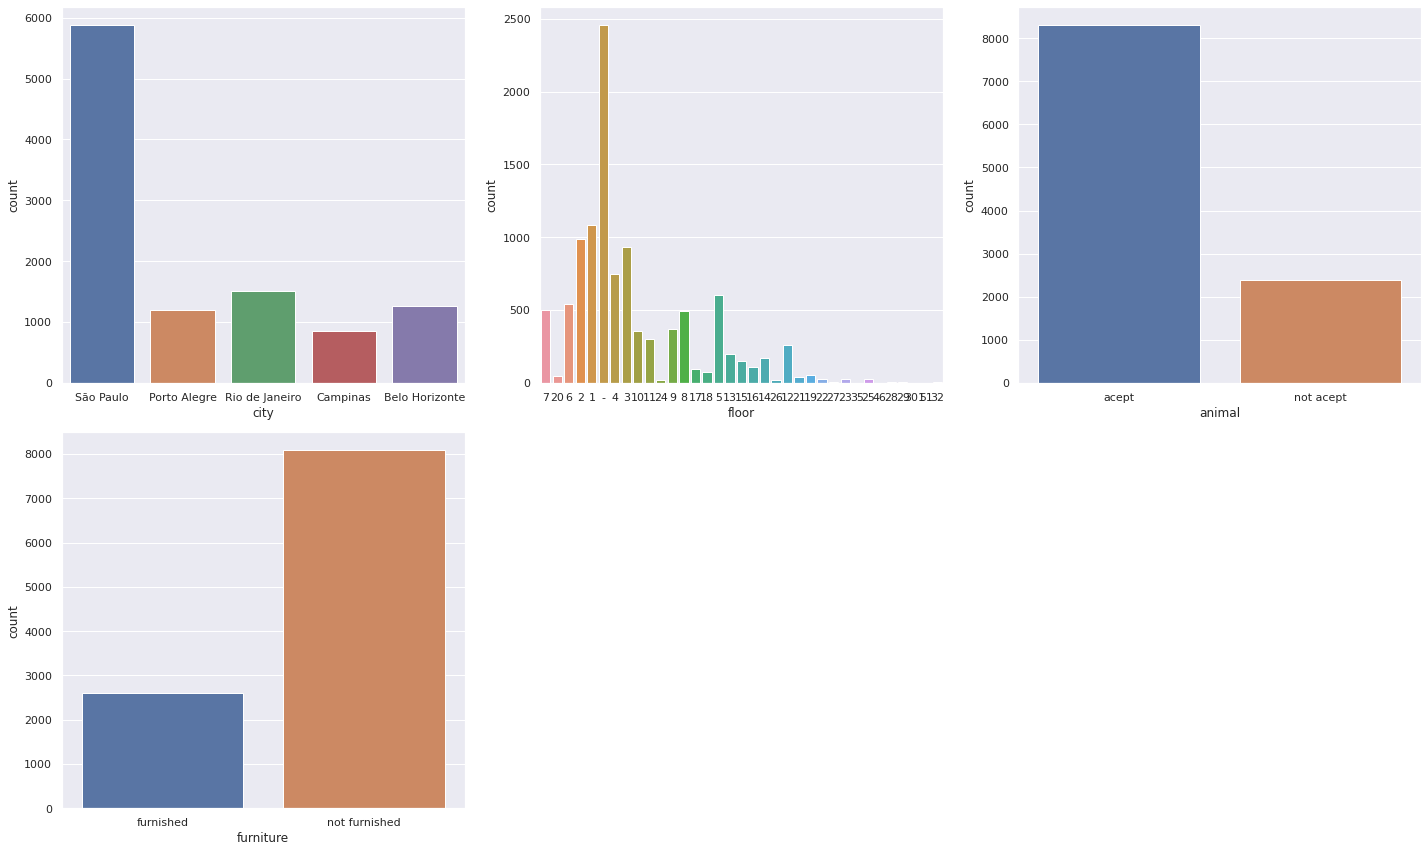

In [ ]:
count_plot(houses,cat_columns)

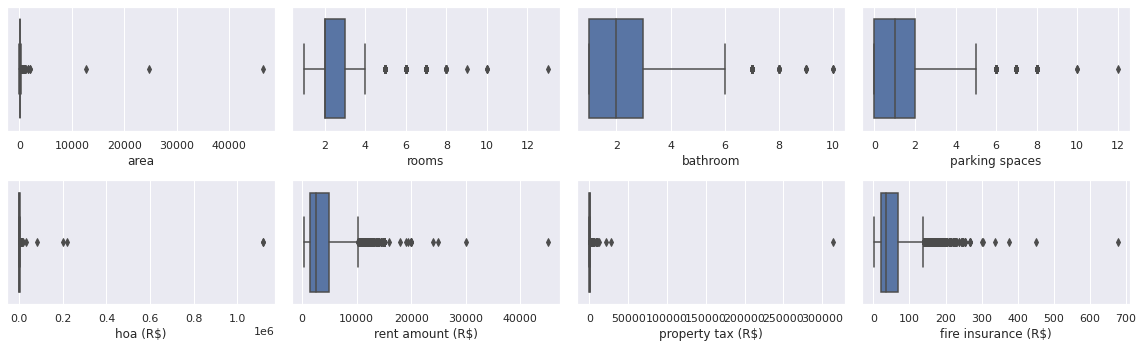

In [ ]:
dist_plot(houses,num_columns)#,type="histogram")

### Identificação dos atributos categóricos

Existem 4 atributos categóricos no conjunto de dados

Os atributos categóricos são : ['city', 'floor', 'animal', 'furniture']

Base de dados utiliza '-' para representar o térreo, converteremos para 0.





In [ ]:
## Encontrar as variáveis categóricas
categorical = [var for var in houses.columns if houses[var].dtype=='O']
print('Existem {} atributos categóricos no conjunto de dados\n'.format(len(categorical)))
print('Os atributos categóricos são :', categorical)

Existem 4 atributos categóricos no conjunto de dados

Os atributos categóricos são : ['city', 'floor', 'animal', 'furniture']


In [ ]:
##Verificar a cardinalidade dos valores categóricos 
for var in categorical:
    print(var, ' contains ', len(houses[var].unique()), ' labels')

city  contains  5  labels
floor  contains  35  labels
animal  contains  2  labels
furniture  contains  2  labels


### Identificação dos dados numéricos

In [ ]:
#num_columns=list(houses.drop(['total (R$)', 'fire insurance (R$)','rent amount (R$)'], axis=1).select_dtypes(include=["int64", "float64"]).columns)
num_columns=list(houses.drop(['total (R$)'], axis=1).select_dtypes(include=["int64", "float64"]).columns)
print(num_columns)

['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']


## Pré processamento manual

Conversão do atributo floor de categórico para numérico

In [ ]:
# tratamento de todos os atributos
cleanup_nums = {"floor": {"-": 0}}

houses = houses.replace(cleanup_nums)
houses["floor"] = pd.to_numeric(houses["floor"])

Definição do negócio: Sendo o nosso atributo alvo 'total (R$)', decidimos categorizar os valores em abaixo e acima de dois salários mínimos:

*   'Baratos de 0 a 2424 reais' por 0 
*   'Caros acima de 2424 reais' por 1






## Definição do Pipeline

### Etapas de pré processamento

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.pipeline import Pipeline as imbpipeline

cat_columns=list(houses.drop(['total (R$)'], axis=1).select_dtypes(include=["object"]).columns)
print(cat_columns)

num_columns=list(houses.drop(['total (R$)'], axis=1).select_dtypes(include=["int64", "float64"]).columns)
print(num_columns)

## pipeline específico para os atributos numéricos
num_pipeline = Pipeline([
                         # ('imputer', SimpleImputer(strategy='median')) # nossa base não possui dados faltantes
                         ('encoder', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')) # discretização dos atributos numéricos
                         ])

## pipeline específico para os atributos categóricos
cat_pipeline = Pipeline([
                         # ('imputer', SimpleImputer(strategy='most_frequent')), # nossa base não possui dados faltantes
                         ('encoder', OneHotEncoder(sparse=False)) # codificação dos atributos categóricos
                         ])

## ColumnTransformer para aplicar cada pipeline ao respectivo tipo de atributo
data_pipeline = ColumnTransformer([
                                   ('numerical', num_pipeline, num_columns),
                                   ('categorical', cat_pipeline, cat_columns)])

['city', 'animal', 'furniture']
['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']


### Modelo 1 (Árvore de decisão) 


In [ ]:
# versão imbpipeline
my_pipeline_arvore = imbpipeline(steps = [['data_transform', data_pipeline],
                                    ['scaler', MinMaxScaler()], # normalização
                                    ['smote', SMOTE()], # tratamento do desbalanceamento
                                    ['tree', DecisionTreeClassifier()]]) # atualizar

# versao pipeline (sem smote)
prep_pipeline = Pipeline(steps=[
                 ('data_transform', data_pipeline),
                 ('data_normalize',MinMaxScaler())])

tree_pipeline = Pipeline(steps=[
                          ('data_preproc', prep_pipeline), 
                          ('tree',DecisionTreeClassifier())])



###  Modelo 2 (SVM)


In [ ]:
my_pipeline_svm = imbpipeline(steps = [['data_transform', data_pipeline],
                                    ['scaler', MinMaxScaler()],
                                    ['smote', SMOTE(random_state=11)],
                                    ['svm', SVC(kernel='linear',class_weight='balanced')]]) ## atualizar





## Avaliação nos dados de teste

### Separação dos dados de treino e teste


In [ ]:
## Teste remoção dos atributos

## Separa o dataset em duas variáveis: os atributos/entradas (X) e a classe/saída (y)
## Removemos também 'fire insurance (R$)','rent amount (R$)', em função da forte correlação com o atributo alvo

#X = houses.drop(['total (R$)','fire insurance (R$)','rent amount (R$)'],axis=1)
X = houses.drop(['total (R$)'], axis=1)

y = houses['total (R$)'].values

## substitui 'Baratos de 0 a 2424 reais' por 0, 'Caros acima de 2424 reais' por 1
y = np.array([0 if y<=2424 else 1 for y in y]) 

## Faz a divisão entre treino (80%) e teste (20%).
## O conjunto de treino representa os dados que serão usados
## ao longo do desenvolvimento do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=42) 





### Modelo 1

In [ ]:
## para um pipeline que termina com um modelo a ser treinado, 
## a chamada para "ajuste" aos dados de treinamento ocorre com .fit () e recebe os 
## atributos (X) e a classe (y). Achamada para aplicação do pipeline aos dados de 
##treino/teste ocorre com .predict()

my_pipeline_arvore.fit(X_train,y_train)

y_test_pred = my_pipeline_arvore.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


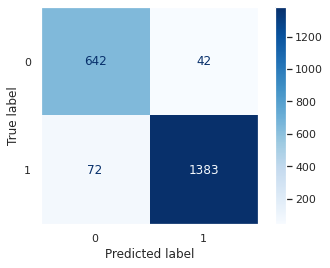

Acurácia: 0.947
Recall: 0.951
Precisão: 0.971


In [ ]:
## Matriz de confusão do teste
cm = confusion_matrix(y_test, y_test_pred,labels=my_pipeline_arvore[3].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_pipeline_arvore[3].classes_)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

print('Acurácia: {}'.format(round(accuracy_score(y_test, y_test_pred),3)))
print('Recall: {}'.format(round(recall_score(y_test, y_test_pred,pos_label=1),3)))
print('Precisão: {}'.format(round(precision_score(y_test,y_test_pred,pos_label=1),3)))

### Modelo 2
Aplicando pipeline para o modelo 2 (SVM) nos dados de teste

In [ ]:
my_pipeline_svm.fit(X_train,y_train)

y_test_pred_svm = my_pipeline_svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


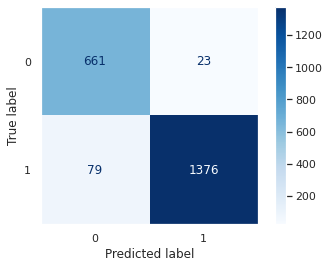

Acurácia: 0.952
Recall: 0.946
Precisão: 0.984


In [ ]:
## Matriz de confusão do teste
cm = confusion_matrix(y_test, y_test_pred_svm,labels=my_pipeline_svm[3].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_pipeline_svm[3].classes_)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

print('Acurácia: {}'.format(round(accuracy_score(y_test, y_test_pred_svm),3)))
print('Recall: {}'.format(round(recall_score(y_test, y_test_pred_svm,pos_label=1),3)))
print('Precisão: {}'.format(round(precision_score(y_test,y_test_pred_svm,pos_label=1),3)))

## Avaliação detalhada do Modelo 1 (Árvore)

Avaliação detalhada do modelo de melhor desempenho no teste (árvore?).


NOVO: Cria uma versão dos dados pré-processados, de acordo com o pipeline definido acima (pre_proc, sem a etapa de classificação)

In [ ]:
#X_train_prep = tree_pipeline['data_preproc'].fit_transform(X_train)
#X_test_prep = tree_pipeline['data_preproc'].transform(X_test)
#columns = np.append(num_columns,prep_pipeline[0].named_transformers_['categorical']['encoder'].get_feature_names_out(cat_columns))
#df_train_prep = pd.DataFrame(X_train_prep, columns=columns)
#df_test_prep = pd.DataFrame(X_test_prep, columns=columns)
#-----------
#NOVO:
columns = np.append(num_columns,my_pipeline_arvore[0].named_transformers_['categorical']['encoder'].get_feature_names_out(cat_columns))
X_train_prep = my_pipeline_arvore['data_transform'].fit_transform(X_train) #
df_train_prep = pd.DataFrame(X_train_prep, columns=columns)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


###  Validação Cruzada
*   StratifiedKFold
*   RepeatedStratifiedKFold



In [ ]:
# métodos de validação cruzada
cv_skf = StratifiedKFold(n_splits = 5, shuffle=True)
cv_rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2) ## usaremos o mesmo nas demais comparações

scores = cross_val_score(my_pipeline_arvore, X_train, y_train, scoring='f1', cv=cv_skf, n_jobs=-1)
print('Média F1: %.3f' % np.mean(scores))
print('Desvio Padrão F1: %.3f' % np.std(scores))

scores = cross_val_score(my_pipeline_arvore, X_train, y_train, scoring='f1', cv=cv_rskf, n_jobs=-1)
print('Média F1: %.3f' % np.mean(scores))
print('Desvio Padrão F1: %.3f' % np.std(scores))

Média F1: 0.965
Desvio Padrão F1: 0.004
Média F1: 0.964
Desvio Padrão F1: 0.003


Ampliando avaliação do RepeatedStratifiedKFold

In [ ]:
# múltiplos scores
scoring = ['f1', 'recall','average_precision','roc_auc','accuracy']

scores_dt2 = cross_validate(estimator=my_pipeline_arvore, X=X_train, y=y_train,scoring=scoring,cv=cv_rskf) 
scores_dt2_df = pd.DataFrame(scores_dt2, columns=scores_dt2.keys()) 
scores_dt2_df

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." %

,fit_time,score_time,test_f1,test_recall,test_average_precision,test_roc_auc,test_accuracy
0,0.209367,0.031944,0.966205,0.957904,0.972635,0.964891,0.954413
1,0.190701,0.019943,0.960860,0.959622,0.959697,0.950484,0.946815
2,0.176020,0.019428,0.960069,0.960481,0.954282,0.943578,0.945646
3,0.175220,0.019696,0.960345,0.957045,0.961312,0.951942,0.946199
4,0.172535,0.019887,0.964655,0.962167,0.963595,0.954736,0.952047
5,0.179139,0.029063,0.962995,0.961340,0.962876,0.954218,0.949737
6,0.176814,0.019689,0.961489,0.954467,0.962344,0.952104,0.947984
7,0.182393,0.020274,0.966225,0.970790,0.967775,0.960955,0.953828
8,0.167539,0.019832,0.960521,0.951031,0.965201,0.954330,0.946784
9,0.174795,0.020046,0.959827,0.955288,0.960735,0.949845,0.945614


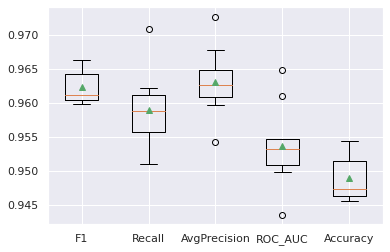

In [ ]:
plt.boxplot(scores_dt2_df[["test_f1","test_recall","test_average_precision","test_roc_auc","test_accuracy"]].T,labels=['F1','Recall','AvgPrecision','ROC_AUC','Accuracy'],showmeans=True)
plt.show()

###  Busca dos melhores hiperparâmetros

In [ ]:
options_scaler = [MinMaxScaler(), StandardScaler(), RobustScaler(),'passthrough']
options_scaler = [MinMaxScaler(), 'passthrough']

options_min_samples_leaf = [1, 5, 10, 20, 50, 100]
options_min_samples_leaf = [1, 5]

options_ccp_alpha = [8.74541424e-05, 1.26191812e-04]
options_ccp_alpha = [8.74541424e-05, 1.26191812e-04, 2.03517388e-04, 4.67377080e-05,
#   5.71389532e-04, 8.72410925e-05, 1.26191812e-04, 2.10319686e-04,
#   4.67377080e-05, 5.70450180e-04, 8.62849994e-05, 1.27466476e-04,
#   2.02841074e-04, 4.67377080e-05, 5.80623718e-04, 8.92525470e-05,
#   1.26191812e-04, 2.06331178e-04, 4.67377080e-05, 5.64334981e-04,
#   9.23492061e-05, 1.26191812e-04, 2.10319686e-04, 4.67377080e-05,
#   6.00947709e-04, 8.58274274e-05, 1.24887503e-04, 2.07429918e-04,
#   4.67377080e-05, 5.81214160e-04]

options_smote = [SMOTE(), RandomUnderSampler(), SMOTETomek(), 'passthrough']
options_smote = [SMOTE(), 'passthrough']

param_grid = {
              'smote': options_smote,
              'scaler': options_scaler,
              'tree__min_samples_leaf': options_min_samples_leaf,
              'tree__ccp_alpha': options_ccp_alpha,
              }

## Instancia uma Grid Search com o pipeline (incluindo etapas de transformação de dados
## e treinamento do modelo) e 10-fold cross-validation
grid = GridSearchCV(my_pipeline_arvore, param_grid, cv=cv_skf,scoring='f1',refit=True)

## Executa a grid Search
grid.fit(X_train, y_train)
print(grid.best_params_)
#print(grid.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." %

{'scaler': 'passthrough', 'smote': SMOTE(), 'tree__ccp_alpha': 8.74541424e-05, 'tree__min_samples_leaf': 1}


Resultado:

{'scaler': MinMaxScaler(), 'smote': 'passthrough', 'tree__ccp_alpha': 0.000571389532, 'tree__min_samples_leaf': 20}

#### Avaliação do modelo utilizando os melhores hiperparâmetros

{'scaler': MinMaxScaler(), 'smote': 'passthrough', 'tree__ccp_alpha': 0.000571389532, 'tree__min_samples_leaf': 20}

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.pipeline import Pipeline as imbpipeline

cat_columns=list(houses.drop(['total (R$)'], axis=1).select_dtypes(include=["object"]).columns)
print(cat_columns)

num_columns=list(houses.drop(['total (R$)'], axis=1).select_dtypes(include=["int64", "float64"]).columns)
print(num_columns)

## pipeline específico para os atributos numéricos
num_pipeline = Pipeline([
                         # ('imputer', SimpleImputer(strategy='median')) # nossa base não possui dados faltantes
                         ('encoder', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')) # discretização dos atributos numéricos
                         ])

## pipeline específico para os atributos categóricos
cat_pipeline = Pipeline([
                         # ('imputer', SimpleImputer(strategy='most_frequent')), # nossa base não possui dados faltantes
                         ('encoder', OneHotEncoder(sparse=False)) # codificação dos atributos categóricos
                         ])

## ColumnTransformer para aplicar cada pipeline ao respectivo tipo de atributo
data_pipeline = ColumnTransformer([
                                   ('numerical', num_pipeline, num_columns),
                                   ('categorical', cat_pipeline, cat_columns)])

prep_pipeline = Pipeline(steps=[
                 ('data_transform', data_pipeline),
                 ('data_normalize',MinMaxScaler())])

tree_pipeline = Pipeline(steps=[
                          ('data_preproc', prep_pipeline), 
                          ('tree',DecisionTreeClassifier(ccp_alpha=0.000571389532, min_samples_leaf = 20))])



X = houses.drop(['total (R$)'], axis=1)
y = houses['total (R$)'].values

## substitui 'Baratos de 0 a 2424 reais' por 0, 'Caros acima de 2424 reais' por 1
y = np.array([0 if y<=2424 else 1 for y in y]) 

## Faz a divisão entre treino (80%) e teste (20%).
## O conjunto de treino representa os dados que serão usados
## ao longo do desenvolvimento do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=42) 

['city', 'animal', 'furniture']
['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


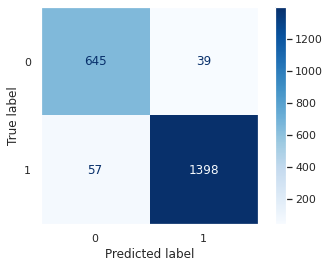

Acurácia: 0.955
Recall: 0.961
Precisão: 0.973


In [ ]:
tree_pipeline.fit(X_train,y_train)
y_test_pred = tree_pipeline.predict(X_test)


## Matriz de confusão do teste
cm = confusion_matrix(y_test, y_test_pred,labels=my_pipeline_arvore[3].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_pipeline_arvore[3].classes_)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

print('Acurácia: {}'.format(round(accuracy_score(y_test, y_test_pred),3)))
print('Recall: {}'.format(round(recall_score(y_test, y_test_pred,pos_label=1),3)))
print('Precisão: {}'.format(round(precision_score(y_test,y_test_pred,pos_label=1),3)))

## Interpretação dos dados

###  Análise de importância de atributos

1. Método da Permutação
2. PDP



####Método da Permutação

In [ ]:
#ORIGINAL
#from sklearn.inspection import permutation_importance 

## faz permutações, treina e avalia modelos, e estima diferença de desempenho (proxy importância)
#perm_importance = permutation_importance(tree_grid_search.best_estimator_['clf'], X_train_prep, y_train, n_repeats=30,random_state=0)

In [ ]:
from sklearn.inspection import permutation_importance 

## faz permutações, treina e avalia modelos, e estima diferença de desempenho (proxy importância)


# prep_pipeline = Pipeline(steps=[
#                  ('data_transform', data_pipeline),
#                  ('data_normalize',MinMaxScaler())])

X_train_prep = tree_pipeline['data_preproc'].fit_transform(X_train)
X_test_prep = tree_pipeline['data_preproc'].transform(X_test)

columns = np.append(num_columns,prep_pipeline[0].named_transformers_['categorical']['encoder'].get_feature_names_out(cat_columns))
#columns
df_train_prep = pd.DataFrame(X_train_prep, columns=columns)
#df_test_prep = pd.DataFrame(X_test_prep, columns=columns)


#perm_importance = permutation_importance(tree_pipeline.fit(X_train,y_train), X_train_prep, y_train, n_repeats=30,random_state=0)
perm_importance = permutation_importance(grid.best_estimator_['tree'], X_train_prep, y_train, n_repeats=30,random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


Analisando a estimativa de importância para cada atributo.

Text(0.5, 1.0, 'Permutation Importance')

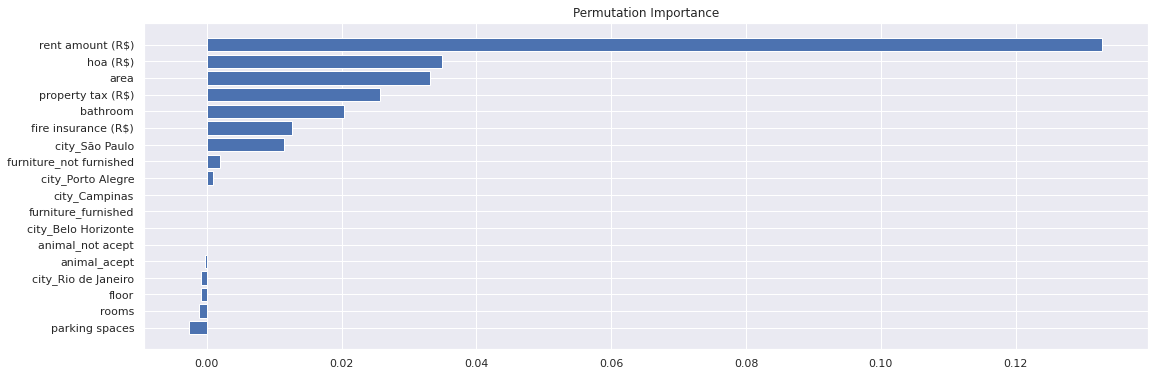

In [ ]:
#columns = np.append(num_columns,my_pipeline_arvore[0].named_transformers_['categorical']['encoder'].get_feature_names_out(cat_columns))
sorted_idx = perm_importance.importances_mean.argsort()
#sorted_idx = perm_importance
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
#plt.barh(range(len(sorted_idx)), perm_importance, align='center')
plt.yticks(range(len(sorted_idx)), np.array(columns)[sorted_idx])
plt.title('Permutation Importance')

Neste ponto vemos os atributos que mais impactam no modelo, mas ainda não sabemos como eles impactam, isto é, se aumentar ou diminuir o valor do atributo aumenta ou diminui as chances para uma determinada classe. 

#### Partial dependence plot (PDP)

Analisa o efeito marginal que alguns atributos têm sobre o resultado previsto de um modelo de aprendizado de máquina. Para um determinado valor do atributo analisado, representa a previsão média do modelo para o caso em que forçamos todas as instâncias a assumirem aquele valor. Permite analisar uma relação entre atributo e saída no modelo.

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

#X_train_prep = my_pipeline_arvore['data_transform'].fit_transform(X_train) #
#df_train_prep = pd.DataFrame(X_train_prep, columns=columns)

features_to_display_num = ['area', 'rooms', 'bathroom', 'parking spaces', 'floor']

features_to_display_valor = ['hoa (R$)',
        'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']

features_to_display_city = ['city_Belo Horizonte', 'city_Campinas',  'city_Porto Alegre',
        'city_Rio de Janeiro',  'city_São Paulo']


features_to_display_cat = ['animal_acept',  'animal_not acept',
        'furniture_furnished',  'furniture_not furnished']



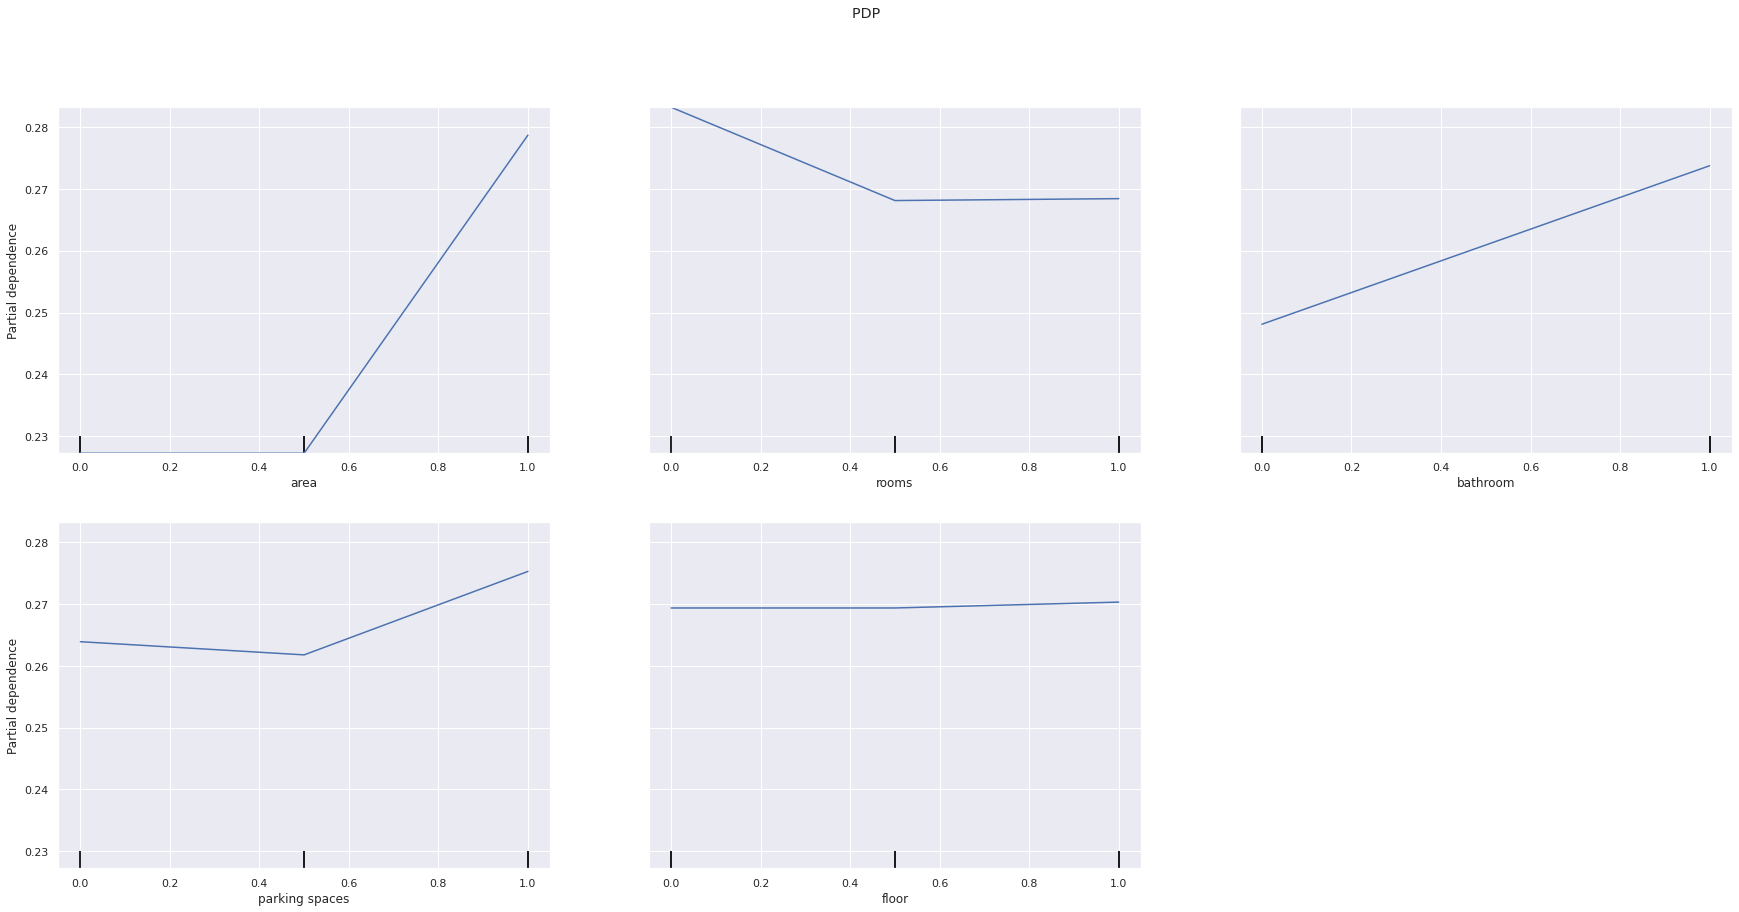

In [ ]:
fig, ax = plt.subplots(figsize=(30, 14))
display_tree = PartialDependenceDisplay.from_estimator(
       estimator=grid.best_estimator_['tree'],
       X=df_train_prep,
       features = features_to_display_num,
       kind='average',
       subsample=50,
       n_jobs=3, 
       grid_resolution=20,
       random_state=42,
       ax=ax,      
)

fig.suptitle('PDP ');

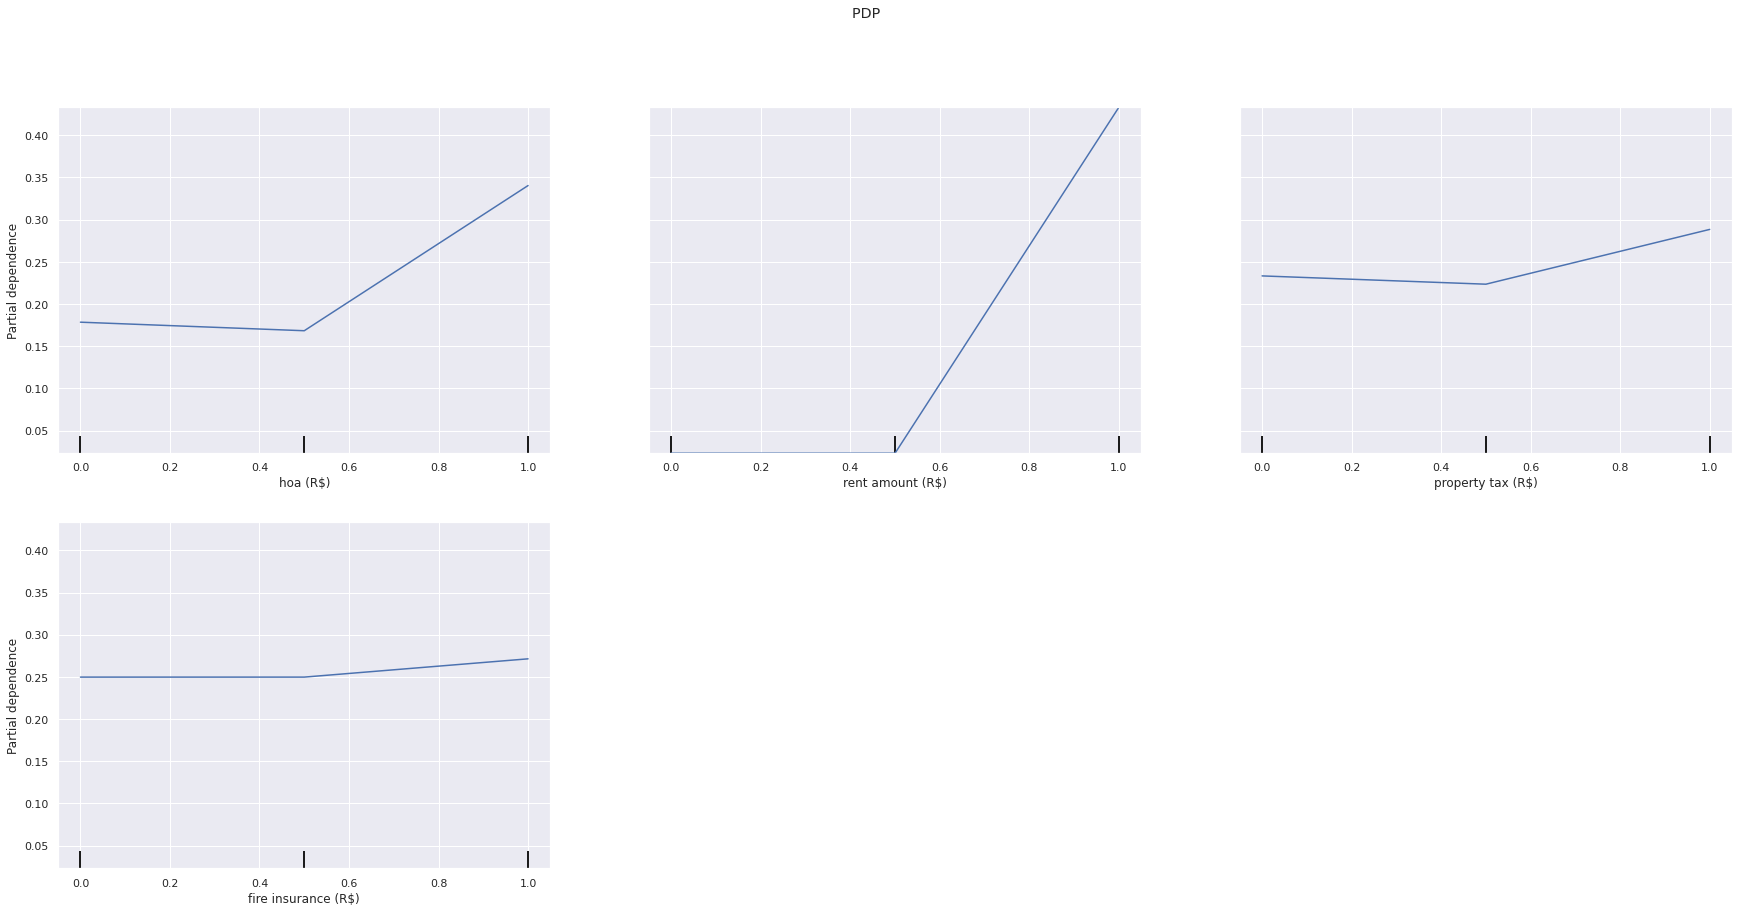

In [ ]:
fig, ax = plt.subplots(figsize=(30, 14))
display_tree = PartialDependenceDisplay.from_estimator(
       estimator=grid.best_estimator_['tree'],
       X=df_train_prep,
       features = features_to_display_valor,
       kind='average',
       subsample=50,
       n_jobs=3, 
       grid_resolution=20,
       random_state=42,
       ax=ax,      
)

fig.suptitle('PDP ');

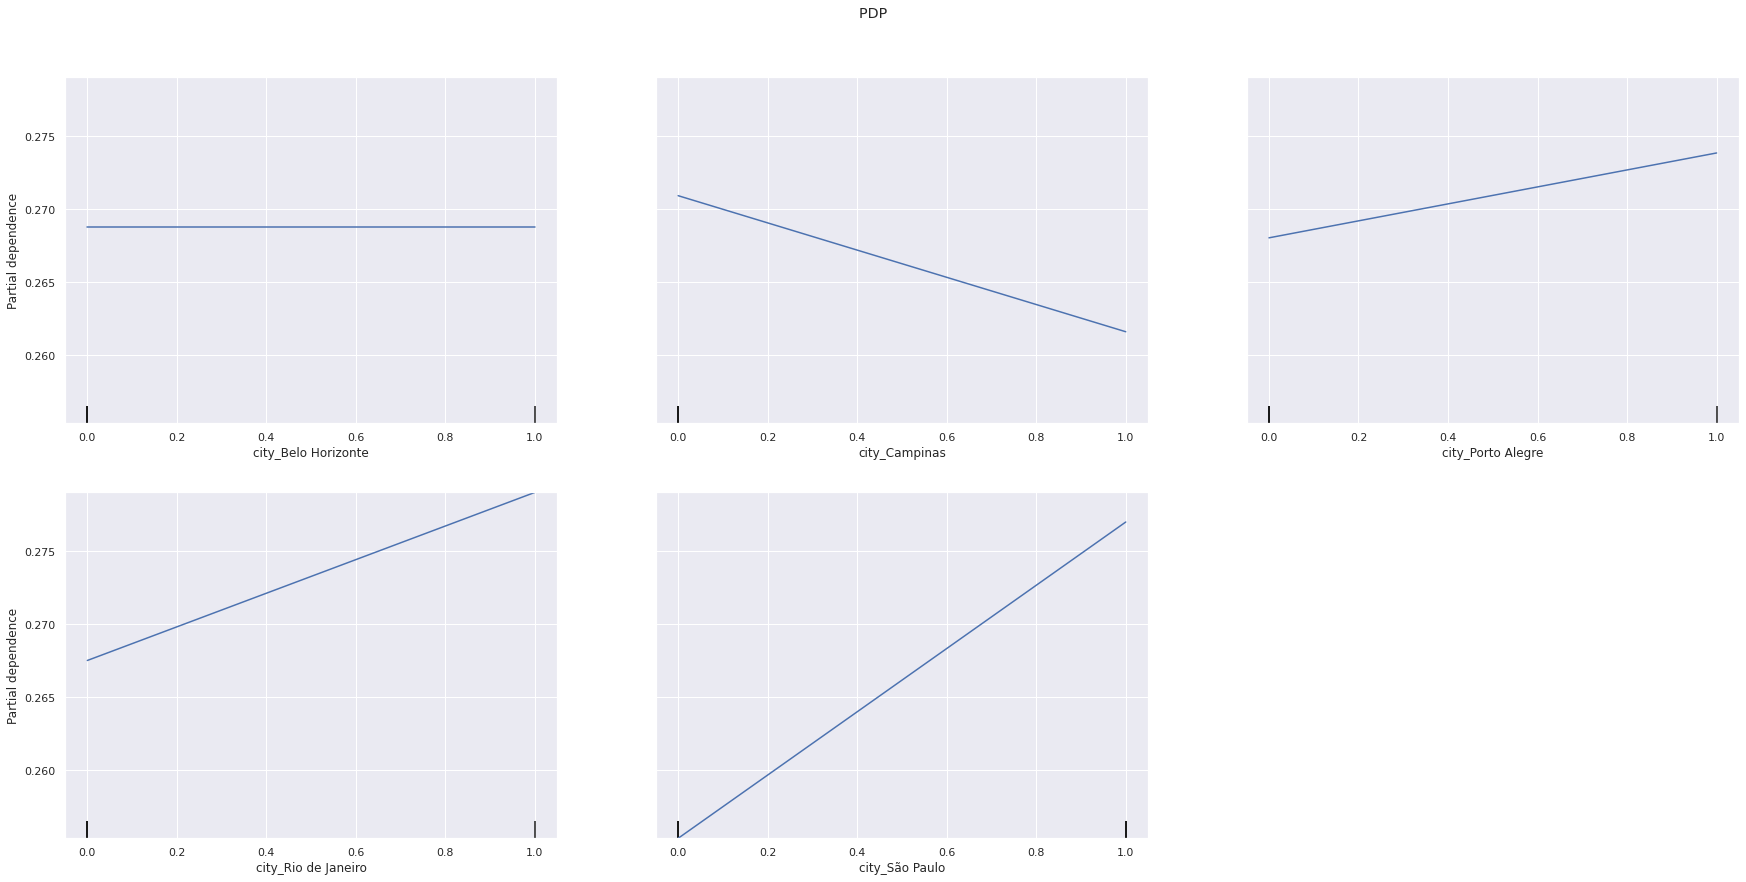

In [ ]:
fig, ax = plt.subplots(figsize=(30, 14))
display_tree = PartialDependenceDisplay.from_estimator(
       estimator=grid.best_estimator_['tree'],
       X=df_train_prep,
       features = features_to_display_city,
       kind='average',
       subsample=50,
       n_jobs=3, 
       grid_resolution=20,
       random_state=42,
       ax=ax,      
)

fig.suptitle('PDP ', y=0.95);

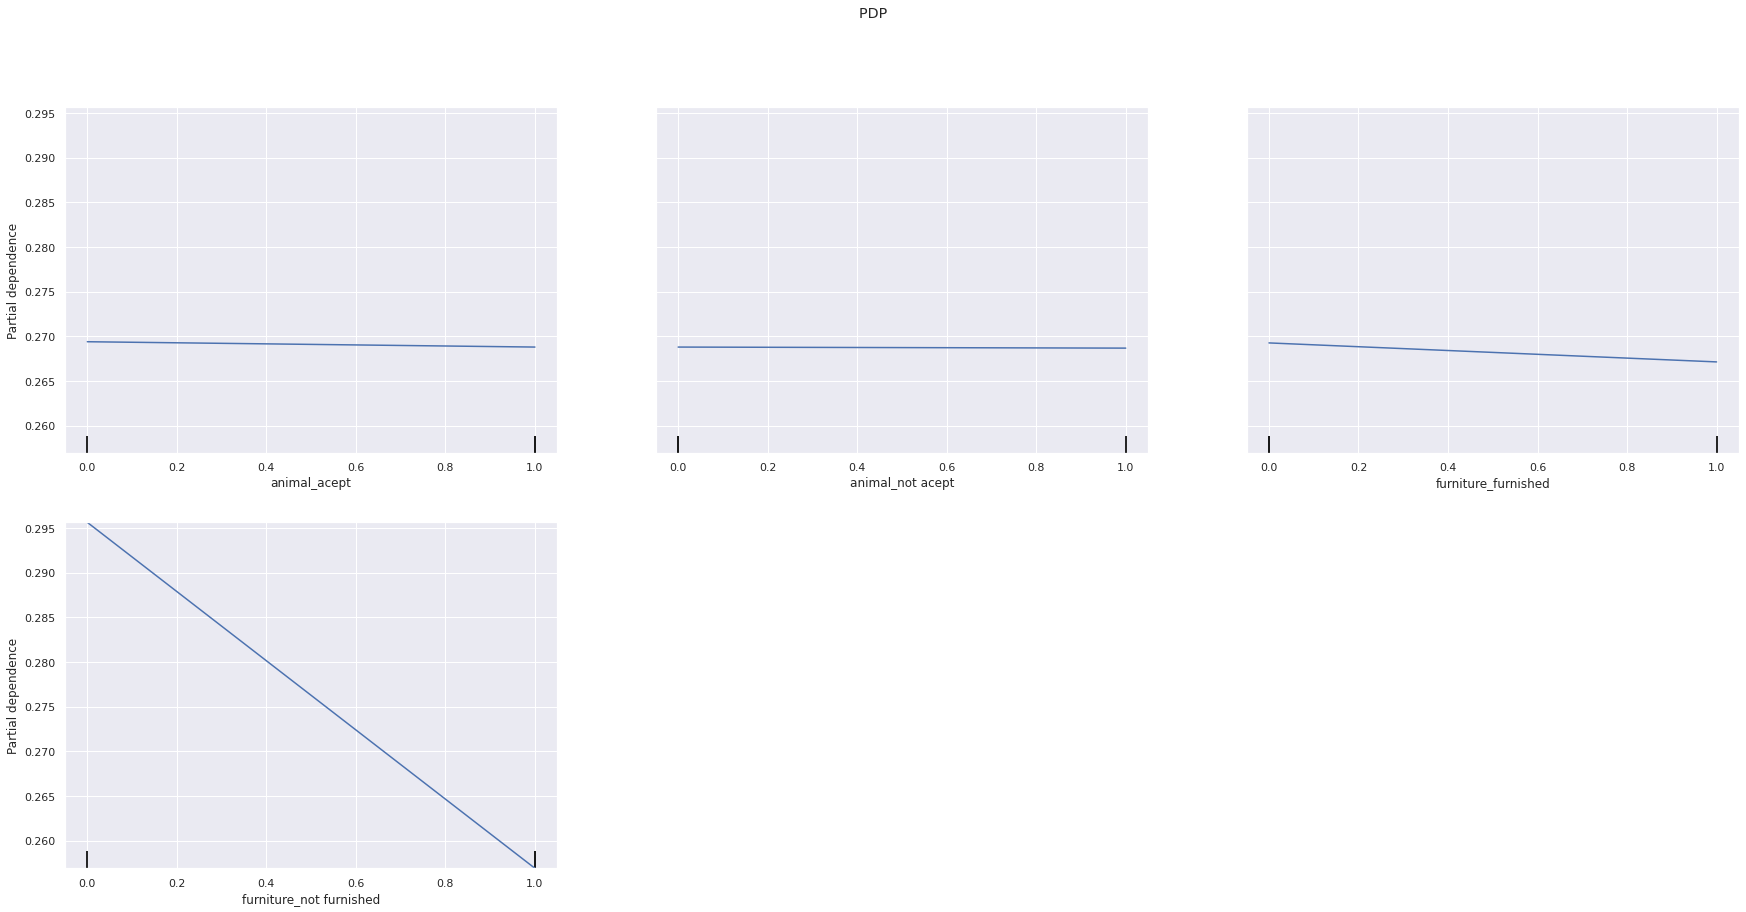

In [ ]:
fig, ax = plt.subplots(figsize=(30, 14))
display_tree = PartialDependenceDisplay.from_estimator(
       estimator=grid.best_estimator_['tree'],
       X=df_train_prep,
       features = features_to_display_cat,
       kind='average',
       subsample=50,
       n_jobs=3, 
       grid_resolution=20,
       random_state=42,
       ax=ax,      
)

fig.suptitle('PDP ');